In [4]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [51]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\bacco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-17 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: C:\Users\bacco\Desktop\Master\SS2023\AI_NN\RPS_Yolo\rpsyolo\Lib\site-packages\requirements.txt not found, check failed.


In [ ]:
model

In [2]:
import uuid
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['Rock', 'Paper','Scissor']
number_imgs = 20

In [7]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
cap.release()
cv2.destroyAllWindows()

In [59]:
rpsmodel = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt')

Using cache found in C:\Users\bacco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-17 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


requirements: C:\Users\bacco\Desktop\Master\SS2023\AI_NN\RPS_Yolo\rpsyolo\Lib\site-packages\requirements.txt not found, check failed.


In [53]:
img = os.path.join('data','images','Paper.c5e2f22a-f4f3-11ed-a36c-e8f40815b24b.jpg')

In [60]:
results = rpsmodel(img)

In [61]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 4.0ms pre-process, 79.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


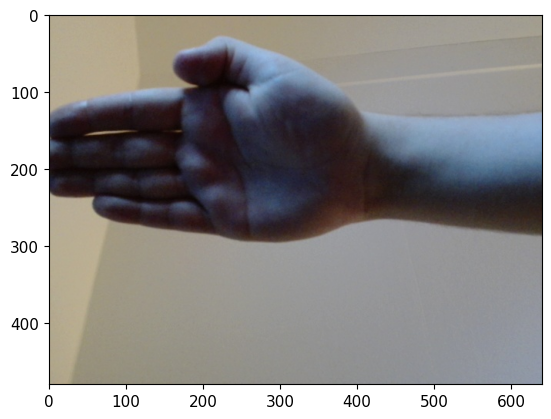

In [50]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

In [17]:
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
cap.release()
cv2.destroyAllWindows()